In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv("ProjectTweets.csv",header = None)

In [3]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
columns_names=['index','id','date','flag','user','text']

In [5]:
df.columns = columns_names

In [6]:
# remove PDT 
df['date'] = df['date'].str.replace('PDT', '')

In [7]:
# time format
date_format = '%a %b %d %H:%M:%S %Y'

In [8]:
# column in object 
df['date'] = pd.to_datetime(df['date'], format=date_format)

In [9]:
# date objects
print(df['date'])

0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: date, Length: 1600000, dtype: datetime64[ns]


In [10]:
df['date'].min()

Timestamp('2009-04-06 22:19:45')

In [11]:
df['date'].max()

Timestamp('2009-06-25 10:28:31')

In [12]:
df['week'] = df['date'].dt.strftime('%U')  # week



In [13]:
df['month'] = df['date'].dt.strftime('%B')  # month

In [14]:
df['day'] = df['date'].dt.strftime('%A')  # day

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   index   1600000 non-null  int64         
 1   id      1600000 non-null  int64         
 2   date    1600000 non-null  datetime64[ns]
 3   flag    1600000 non-null  object        
 4   user    1600000 non-null  object        
 5   text    1600000 non-null  object        
 6   week    1600000 non-null  object        
 7   month   1600000 non-null  object        
 8   day     1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 109.9+ MB


In [16]:
import nltk

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in df['text']:
    pol_score = sia.polarity_scores(line)
    pol_score['text'] = line
    results.append(pol_score)

In [19]:
df1 = pd.DataFrame.from_records(results)
df1.head()

,neg,neu,pos,compound,text
0,0.129,0.745,0.126,-0.0173,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0.303,0.697,0.000,-0.7500,is upset that he can't update his Facebook by ...
2,0.000,0.833,0.167,0.4939,@Kenichan I dived many times for the ball. Man...
3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire
4,0.241,0.759,0.000,-0.6597,"@nationwideclass no, it's not behaving at all...."


In [20]:
df1['label'] = 0
df1.loc[df1['compound'] > 0.2, 'label'] = 1
df1.loc[df1['compound'] < -0.2, 'label'] = -1
df1.head()

,neg,neu,pos,compound,text,label
0,0.129,0.745,0.126,-0.0173,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0.303,0.697,0.000,-0.7500,is upset that he can't update his Facebook by ...,-1
2,0.000,0.833,0.167,0.4939,@Kenichan I dived many times for the ball. Man...,1
3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire,-1
4,0.241,0.759,0.000,-0.6597,"@nationwideclass no, it's not behaving at all....",-1


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

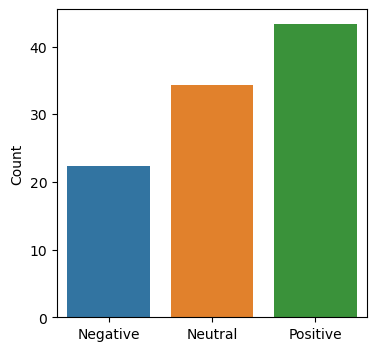

In [22]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df1.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

In [23]:
merged_df = pd.merge(df, df1, on="text", how="inner")

In [24]:
merged_df.head()

,index,id,date,flag,user,text,week,month,day,neg,neu,pos,compound,label
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,0.129,0.745,0.126,-0.0173,0
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,0.303,0.697,0.000,-0.7500,-1
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,0.000,0.833,0.167,0.4939,1
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,0.321,0.500,0.179,-0.2500,-1
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,0.241,0.759,0.000,-0.6597,-1


In [25]:
from textblob import TextBlob

def assign_sentiment(text):
    
    blob = TextBlob(text)
    
    
    sentimento = blob.sentiment.polarity
    
    
    return sentimento


In [26]:

df['sentiment'] = df['text'].apply(assign_sentiment)


In [27]:
df.head()

,index,id,date,flag,user,text,week,month,day,sentiment
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,0.216667
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,0.000000
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,0.500000
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,0.200000
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,-0.625000


In [28]:

df['label'] = 0

df.loc[df['sentiment'] > 0.2, 'label'] = 1
df.loc[df['sentiment'] < -0.2, 'label'] = -1


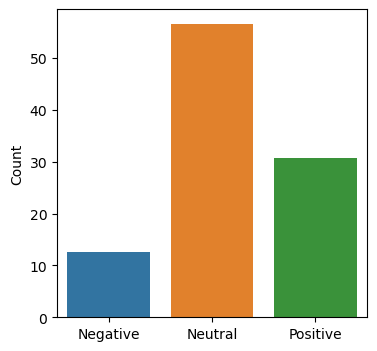

In [29]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

In [30]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score



In [31]:
# Tokenization, Stopword Removal, and Lemmatization
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

documents = []
labels = []

In [33]:
data = df['text']

In [34]:
type(data)

pandas.core.series.Series

In [35]:
merged_df.head()

,index,id,date,flag,user,text,week,month,day,neg,neu,pos,compound,label
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,0.129,0.745,0.126,-0.0173,0
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,0.303,0.697,0.000,-0.7500,-1
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,0.000,0.833,0.167,0.4939,1
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,0.321,0.500,0.179,-0.2500,-1
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,0.241,0.759,0.000,-0.6597,-1


In [36]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [37]:
merged_df['solo_data'] = merged_df['date'].dt.date

In [307]:
grouped_df_cat= merged_df.groupby('solo_data')['label'].apply(lambda x: x.mode().iloc[0]).reset_index()


In [137]:
grouped_df = merged_df.groupby('solo_data')['compound'].mean().reset_index()


In [308]:
grouped_df_cat.head()

,solo_data,label
0,2009-04-06,0
1,2009-04-07,1
2,2009-04-17,1
3,2009-04-18,1
4,2009-04-19,1


In [310]:
plt.figure(figsize=(10, 6))  # chart


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

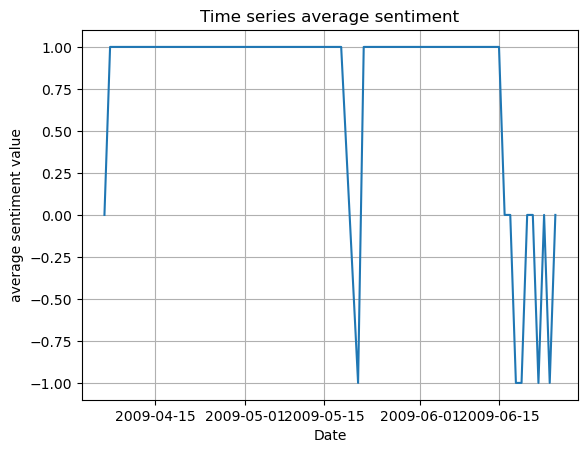

In [312]:
plt.plot(grouped_df_cat['solo_data'], grouped_df_cat['label'])  
plt.title('Time series average sentiment')  
plt.xlabel('Date')  
plt.ylabel('average sentiment value')  
plt.grid(True)  
plt.show()  

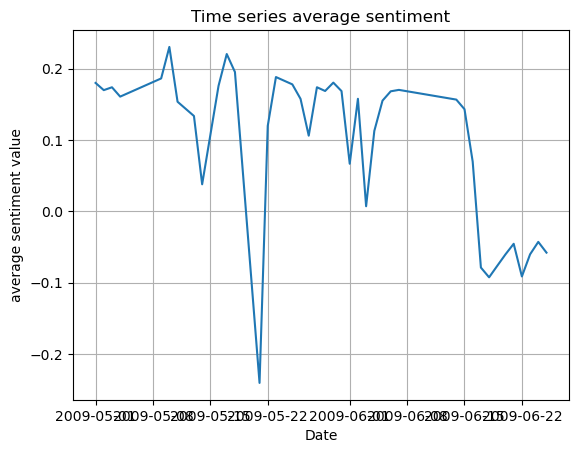

In [314]:
plt.plot(grouped_df['solo_data'], grouped_df['compound'])  
plt.title('Time series average sentiment')  
plt.xlabel('Date')  
plt.ylabel('average sentiment value')  
plt.grid(True)  
plt.show()  

In [139]:
from statsmodels.tsa.stattools import adfuller



# test ADF
result = adfuller(grouped_df['compound'])

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]


if p_value < 0.05:
    print("time series is stationary (Ho rejected)")
else:
    print("time series is not stationary (H1 accepted)")


print(f'ADF Statistic: {adf_statistic}')
print(f'Critical Values: {critical_values}')


time series is stationary (Ho rejected)
ADF Statistic: -3.311272074021021
Critical Values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


In [140]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   solo_data  48 non-null     object 
 1   compound   48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [141]:
grouped_df = grouped_df.drop(range(7))

In [142]:
grouped_df

,solo_data,compound
7,2009-05-01,0.180038
8,2009-05-02,0.169917
9,2009-05-03,0.173946
10,2009-05-04,0.160835
11,2009-05-09,0.186334
12,2009-05-10,0.230544
13,2009-05-11,0.153647
14,2009-05-13,0.133649
15,2009-05-14,0.037866
16,2009-05-16,0.176022


In [143]:
grouped_df['solo_data'] = pd.to_datetime(grouped_df['solo_data']) # get day of week
grouped_df['giorno_settimana'] = grouped_df['solo_data'].dt.day_name()


In [144]:
test_set_start_index = len(grouped_df) - 10

# split dataset into training and test set
train_set = grouped_df.iloc[:test_set_start_index]
test_set = grouped_df.iloc[test_set_start_index:]

In [145]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 38 to 47
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   solo_data         10 non-null     datetime64[ns]
 1   compound          10 non-null     float64       
 2   giorno_settimana  10 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 372.0+ bytes


In [146]:
train_set.head(2)

,solo_data,compound,giorno_settimana
7,2009-05-01,0.180038,Friday
8,2009-05-02,0.169917,Saturday


In [147]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [148]:
print(grouped_df['compound'].dtype)


float64


In [149]:
import numpy as np
from scipy.interpolate import CubicSpline


In [150]:
dates = np.array(grouped_df['solo_data'])  


In [151]:
values = np.array(grouped_df['compound'])  

In [152]:
numeric_dates = np.arange(len(dates))


In [153]:
cubic_interp = CubicSpline(numeric_dates, values)


In [154]:
date_min = min(grouped_df['solo_data'])
date_max = max(grouped_df['solo_data'])

In [155]:
list_dates = grouped_df['solo_data'].tolist()

In [156]:
from datetime import datetime, timedelta

delta = date_max - date_min

# Crea una lista di date nel periodo
date_list = [date_min + timedelta(days=i) for i in range(delta.days + 1)]

# Stampa la lista di date
print(date_list)


[Timestamp('2009-05-01 00:00:00'), Timestamp('2009-05-02 00:00:00'), Timestamp('2009-05-03 00:00:00'), Timestamp('2009-05-04 00:00:00'), Timestamp('2009-05-05 00:00:00'), Timestamp('2009-05-06 00:00:00'), Timestamp('2009-05-07 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2009-05-09 00:00:00'), Timestamp('2009-05-10 00:00:00'), Timestamp('2009-05-11 00:00:00'), Timestamp('2009-05-12 00:00:00'), Timestamp('2009-05-13 00:00:00'), Timestamp('2009-05-14 00:00:00'), Timestamp('2009-05-15 00:00:00'), Timestamp('2009-05-16 00:00:00'), Timestamp('2009-05-17 00:00:00'), Timestamp('2009-05-18 00:00:00'), Timestamp('2009-05-19 00:00:00'), Timestamp('2009-05-20 00:00:00'), Timestamp('2009-05-21 00:00:00'), Timestamp('2009-05-22 00:00:00'), Timestamp('2009-05-23 00:00:00'), Timestamp('2009-05-24 00:00:00'), Timestamp('2009-05-25 00:00:00'), Timestamp('2009-05-26 00:00:00'), Timestamp('2009-05-27 00:00:00'), Timestamp('2009-05-28 00:00:00'), Timestamp('2009-05-29 00:00:00'), Timestamp('20

In [157]:
list_dates

[Timestamp('2009-05-01 00:00:00'),
 Timestamp('2009-05-02 00:00:00'),
 Timestamp('2009-05-03 00:00:00'),
 Timestamp('2009-05-04 00:00:00'),
 Timestamp('2009-05-09 00:00:00'),
 Timestamp('2009-05-10 00:00:00'),
 Timestamp('2009-05-11 00:00:00'),
 Timestamp('2009-05-13 00:00:00'),
 Timestamp('2009-05-14 00:00:00'),
 Timestamp('2009-05-16 00:00:00'),
 Timestamp('2009-05-17 00:00:00'),
 Timestamp('2009-05-18 00:00:00'),
 Timestamp('2009-05-21 00:00:00'),
 Timestamp('2009-05-22 00:00:00'),
 Timestamp('2009-05-23 00:00:00'),
 Timestamp('2009-05-25 00:00:00'),
 Timestamp('2009-05-26 00:00:00'),
 Timestamp('2009-05-27 00:00:00'),
 Timestamp('2009-05-28 00:00:00'),
 Timestamp('2009-05-29 00:00:00'),
 Timestamp('2009-05-30 00:00:00'),
 Timestamp('2009-05-31 00:00:00'),
 Timestamp('2009-06-01 00:00:00'),
 Timestamp('2009-06-02 00:00:00'),
 Timestamp('2009-06-03 00:00:00'),
 Timestamp('2009-06-04 00:00:00'),
 Timestamp('2009-06-05 00:00:00'),
 Timestamp('2009-06-06 00:00:00'),
 Timestamp('2009-06-

In [158]:
valori_mancanti = list(set(date_list) - set(list_dates))

print(valori_mancanti)

[Timestamp('2009-05-20 00:00:00'), Timestamp('2009-06-09 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2009-06-11 00:00:00'), Timestamp('2009-05-07 00:00:00'), Timestamp('2009-06-10 00:00:00'), Timestamp('2009-06-13 00:00:00'), Timestamp('2009-05-24 00:00:00'), Timestamp('2009-05-12 00:00:00'), Timestamp('2009-06-12 00:00:00'), Timestamp('2009-05-06 00:00:00'), Timestamp('2009-05-05 00:00:00'), Timestamp('2009-05-15 00:00:00'), Timestamp('2009-06-08 00:00:00'), Timestamp('2009-05-19 00:00:00')]


In [212]:
df5 = pd.DataFrame({'solo_data': valori_mancanti})


In [213]:
df5['compound']= ' '

In [214]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  15 non-null     datetime64[ns]
 1   compound   15 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 368.0+ bytes


In [215]:
df5['solo_data'] = pd.to_datetime(df5['solo_data'])

In [216]:
df5 = df5.sort_values(by='solo_data')

In [217]:
grouped_df

,solo_data,compound,giorno_settimana
7,2009-05-01,0.180038,Friday
8,2009-05-02,0.169917,Saturday
9,2009-05-03,0.173946,Sunday
10,2009-05-04,0.160835,Monday
11,2009-05-09,0.186334,Saturday
12,2009-05-10,0.230544,Sunday
13,2009-05-11,0.153647,Monday
14,2009-05-13,0.133649,Wednesday
15,2009-05-14,0.037866,Thursday
16,2009-05-16,0.176022,Saturday


In [218]:
df5['compound'].replace(' ', pd.NA, inplace=True)

In [219]:
df_concatenato = pd.concat([grouped_df, df5], axis=0)

In [220]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 7 to 6
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   solo_data         56 non-null     datetime64[ns]
 1   compound          41 non-null     float64       
 2   giorno_settimana  41 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.8+ KB


In [221]:
df_concatenato['solo_data'] = pd.to_datetime(df_concatenato['solo_data'])

In [222]:
df_concatenato = df_concatenato.sort_values(by='solo_data')

In [227]:
df_concatenato

,solo_data,compound,giorno_settimana
7,2009-05-01,0.180038,Friday
8,2009-05-02,0.169917,Saturday
9,2009-05-03,0.173946,Sunday
10,2009-05-04,0.160835,Monday
11,2009-05-05,0.160835,NaN
10,2009-05-06,0.160835,NaN
4,2009-05-07,0.160835,NaN
2,2009-05-08,0.160835,NaN
11,2009-05-09,0.186334,Saturday
12,2009-05-10,0.230544,Sunday


In [224]:
import numpy as np
from scipy.interpolate import CubicSpline


dates_with_nulls = df_concatenato.loc[df_concatenato['compound'].isnull(), 'solo_data']

numeric_dates = dates_with_nulls.values

interpolated_values = cubic_interp(numeric_dates)




In [225]:
interpolated_values

array([6.60927635e+51, 6.61065635e+51, 6.61203654e+51, 6.61341693e+51,
       6.61894038e+51, 6.62308499e+51, 6.62861383e+51, 6.62999652e+51,
       6.63552920e+51, 6.65630417e+51, 6.65769070e+51, 6.65907743e+51,
       6.66046436e+51, 6.66185147e+51, 6.66323878e+51])

In [226]:
df_concatenato.sort_values(by="solo_data", inplace=True)

# Applica il Forward Fill alla colonna "compound"
df_concatenato["compound"].fillna(method='ffill', inplace=True)

In [246]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 7 to 47
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   solo_data         56 non-null     datetime64[ns]
 1   compound          56 non-null     float64       
 2   giorno_settimana  41 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.8+ KB


In [247]:

df_concatenato = df_concatenato.set_index('solo_data')


In [248]:
test_set_start_index = len(df_concatenato) - 10

# split dataset into training and test set
train_set = df_concatenato.iloc[:test_set_start_index]
test_set = df_concatenato.iloc[test_set_start_index:]

In [298]:
# test_set_start_index = len(grouped_df) - 10

# split dataset into training and test set
# train_set = grouped_df.iloc[:test_set_start_index]
# test_set = grouped_df.iloc[test_set_start_index:]

In [339]:
from pmdarima import auto_arima


p_values = range(0, 3)  # Range per p
d_values = range(0, 3)  # Range per d
q_values = range(0, 3)  # Range per q

# grid search using auto_arima
best_model = auto_arima(train_set['compound'], 
                        start_p=min(p_values),
                        start_d=min(d_values),
                        start_q=min(q_values),
                        max_p=max(p_values),
                        max_d=max(d_values),
                        max_q=max(q_values),
                        seasonal=False,  # ARIMA non stagionale
                        stepwise=True,  # Esecuzione passo-passo
                        suppress_warnings=True,  # Nascondi avvisi
                        error_action="ignore",  # Ignora errori
                        trace=True)  # Mostra il percorso della ricerca




Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-22.262, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-43.443, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-32.621, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-43.949, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-59.205, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-59.800, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-61.796, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-59.803, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-57.891, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.335 seconds


In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Definiamo il modello ARIMA
model = ARIMA(train_set['compound'], order=(0, 0, 0))  # Ordine p, d, q



In [301]:
# Addestriamo il modello
model_fit = model.fit()




In [302]:
predictions = model_fit.forecast(len(test_set))

In [303]:
predictions

38    0.140558
39    0.140558
40    0.140558
41    0.140558
42    0.140558
43    0.140558
44    0.140558
45    0.140558
46    0.140558
47    0.140558
Name: predicted_mean, dtype: float64

In [304]:
# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [305]:
test_set

,solo_data,compound,giorno_settimana
38,2009-06-16,0.069586,Tuesday
39,2009-06-17,-0.078922,Wednesday
40,2009-06-18,-0.092630,Thursday
41,2009-06-19,-0.076426,Friday
42,2009-06-20,-0.060388,Saturday
43,2009-06-21,-0.045583,Sunday
44,2009-06-22,-0.091398,Monday
45,2009-06-23,-0.060356,Tuesday
46,2009-06-24,-0.042929,Wednesday
47,2009-06-25,-0.058005,Thursday


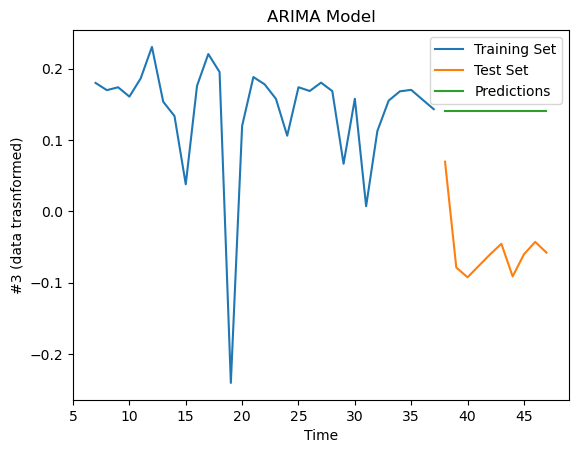

In [306]:
plt.plot(train_set['compound'], label='Training Set')
plt.plot(test_set['compound'], label='Test Set')
plt.plot(test_set.index, predictions, label='Predictions')
plt.legend()
plt.xlabel('Time')
plt.ylabel('#3 (data trasnformed)')
plt.title('ARIMA Model')
plt.show()

In [315]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split



2023-10-29 13:29:29.728278: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [318]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
lab_encoded = label_encoder.fit_transform(grouped_df_cat.label)
#categorical variable


In [320]:
X_train, X_test, y_train, y_test = train_test_split(grouped_df_cat, lab_encoded, test_size=0.2, random_state=0)


In [321]:
#  RNN
model = Sequential([
    SimpleRNN(32, input_shape=(X_train.shape[1], 1)),
    Dense(3, activation='softmax')  # 
])



In [322]:
# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [333]:
type(X_train['solo_data']) 

pandas.core.series.Series

In [336]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [334]:
# Addestra il modello
model.fit(X_train, y_train, epochs=10, batch_size=32)



ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

In [ ]:
# Valuta il modello
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)